<a href="https://colab.research.google.com/github/Dunckleosteus/seismic/blob/dominus/seismic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bruges

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 1.8 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bruges
import bruges.filters as bf
from scipy.interpolate import interp1d
import matplotlib.patches as mpatches

In [3]:
!rm data.zip
!rm -r data
!wget https://github.com/Dunckleosteus/seismic/raw/18908e9e23b56529c5744c96fac2a5216cd298cd/data.zip
!unzip data.zip

rm: cannot remove 'data.zip': No such file or directory
rm: cannot remove 'data': No such file or directory
--2025-03-23 18:45:43--  https://github.com/Dunckleosteus/seismic/raw/18908e9e23b56529c5744c96fac2a5216cd298cd/data.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dunckleosteus/seismic/18908e9e23b56529c5744c96fac2a5216cd298cd/data.zip [following]
--2025-03-23 18:45:43--  https://raw.githubusercontent.com/Dunckleosteus/seismic/18908e9e23b56529c5744c96fac2a5216cd298cd/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1512 (1.5K) [application/zip]
Saving to: ‘data.zip’

data.zip  

In [4]:
rhob = pd.read_csv('data/rhob.csv', index_col=0)
rhob

,0;2300,0;2300.1,0;2300.2,0;2300.3,0;2300.4,0;2300.5,0;2300.6,0;2300.7,0;2300.8,0;2300.9,...,0;2300.21,0;2300.22,0;2300.23,0;2300.24,0;2300.25,0;2300.26,0;2300.27,0;2300.28,0;2300.29,0
2300,,,,,,,,,,,,,,,,,,,,,
2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,...,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0
2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,...,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0
2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,...,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0
2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,...,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0
2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,...,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0
2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,...,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0
2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,...,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0
2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,...,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0
2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,...,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0;2300,0


In [5]:

df_path_list = [
    "data/rhob.csv",
    "data/vph.csv",
    "data/x.csv",
    "data/y.csv",
]
df_list = [pd.read_csv(path, index_col=None, header=None, sep=";") for path in df_path_list]
[df.dropna(inplace=True) for df in df_list]
for df in df_list:
  for col in df.columns:
    try:
      df[col] = df[col].str.replace(",", ".").astype(float).values
    except:
      df.values

array = np.stack(df_list)
array.shape

(4, 13, 31)

<ipython-input-6-0fed94de53ce>:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.12, 1, 1])


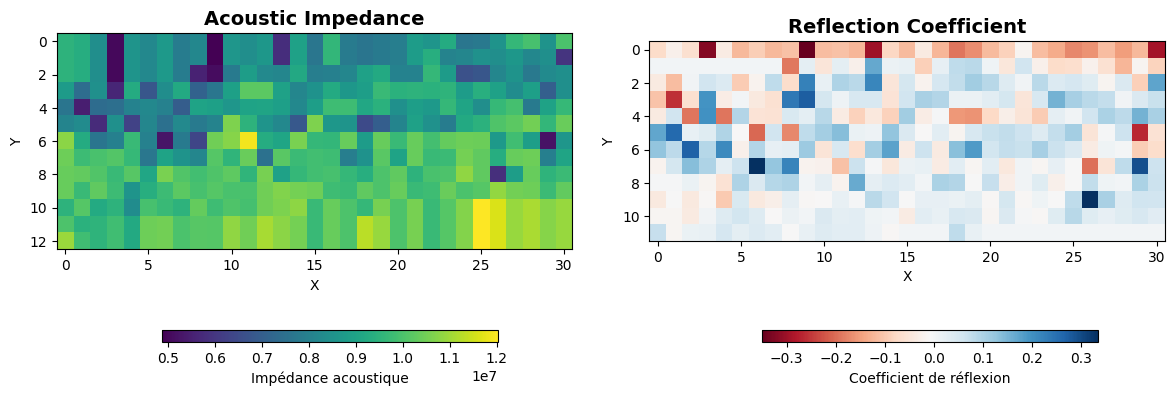

In [6]:
#Conversion depth-time
TWT = (0.2 / array[1, :, :])
TWT = np.cumsum(TWT, axis=0) * 2 * 1000 #pour travailler en secondes

# Calcul de l'impédance acoustique
imp = array[0, :, :] * array[1, :, :]

# Calcul du coefficient de réflexion
I = np.roll(imp, shift=1, axis=0)[:-1, :]
In1 = imp[1:, :]
RC = (In1 - I) / (In1 + I)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
im1 = axs[0].imshow(imp, cmap="viridis", interpolation="nearest")
axs[0].set_title("Acoustic Impedance", fontsize=14, fontweight="bold")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

im2 = axs[1].imshow(RC, cmap="RdBu", interpolation="nearest")
axs[1].set_title("Reflection Coefficient", fontsize=14, fontweight="bold")
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")

cbar_ax1 = fig.add_axes([0.15, 0.225, 0.28, 0.02])
cbar_ax2 = fig.add_axes([0.65, 0.225, 0.28, 0.02])

fig.colorbar(im1, cax=cbar_ax1, orientation="horizontal", label="Impédance acoustique")
fig.colorbar(im2, cax=cbar_ax2, orientation="horizontal", label="Coefficient de réflexion")

plt.tight_layout(rect=[0, 0.12, 1, 1])

plt.show()


<Figure size 1500x600 with 0 Axes>

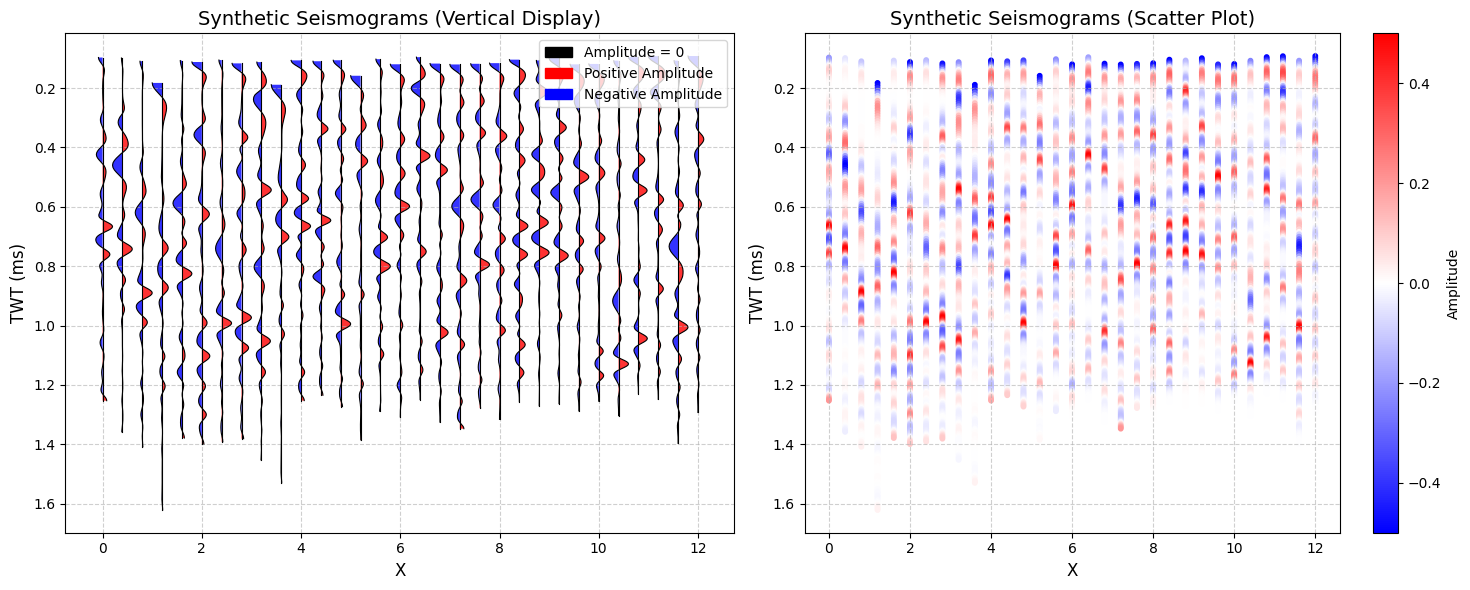

In [9]:
rc = RC[1,:]
RC2 = np.transpose(RC)

traces = []
rc_list = []

x_values_list = []
amplitude_list = []
time_list = []

#Création d'une fonction pour créer une wavelet avec des paramètres utilisateurs
def create_wavelet(offset, amplitude, length=0.256, frequency=40, sample_intervall=0.01):
  w, t = bf.ricker(length, sample_intervall, frequency)
  t += offset
  w *= amplitude
  return w,t

w, t = create_wavelet(1.5, 0.2, sample_intervall=0.001)

#Fonction de pré-convolution
def expand_with_zeros(arr, target_length):
    if len(arr) == target_length:
        return arr
    new_arr = np.zeros(target_length)
    indices = np.linspace(0, target_length - 1, len(arr), dtype=int)
    for i, index in enumerate(indices):
        new_arr[index] = arr[i]
    return list(new_arr)

def equalize_arrays(arr1, arr2):
    max_length = max(len(arr1), len(arr2))

    arr1_expanded = expand_with_zeros(arr1, max_length)
    arr2_expanded = expand_with_zeros(arr2, max_length)

    return arr1_expanded, arr2_expanded

rc2, w2 = equalize_arrays(rc, w)

#version numpy
#Convolution

syn = np.convolve(rc2, w2, mode='same')

plt.figure(figsize=(15, 6))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

for i, rc in enumerate(RC2):
    rc2, w2 = equalize_arrays(rc, w)
    syn = np.convolve(rc2, w2, mode='same')
    time_original = TWT[:, i]

    if len(time_original) != len(rc2):
        f = interp1d(np.linspace(0, 1, len(time_original)), time_original, kind='linear', fill_value="extrapolate")
        time_resampled = f(np.linspace(0, 1, len(rc2)))
    else:
        time_resampled = time_original

    syn_norm = syn / np.max(np.abs(syn)) * 0.5
    x_values = syn_norm + i

    for amp, t in zip(syn_norm, time_resampled):
      x_values_list.append(i)
      amplitude_list.append(amp)
      time_list.append(t)

    x_values = x_values * 0.4
    i = i * 0.4

    axs[0].plot([i, i], [time_resampled[0], time_resampled[-1]], color='black', linewidth=0.8, label="Amplitude 0" if i == 0 else "")
    axs[0].plot(x_values, time_resampled, color='black', linewidth=0.8)
    axs[0].fill_betweenx(time_resampled, i, x_values, where=(syn_norm >= 0), facecolor='red', alpha=0.8, label="Positive Amplitude" if i == 0 else "")
    axs[0].fill_betweenx(time_resampled, i, x_values, where=(syn_norm < 0), facecolor='blue', alpha=0.8, label="Negative Amplitude" if i == 0 else "")

axs[0].invert_yaxis()
axs[0].set_xlabel('X', fontsize=12)
axs[0].set_ylabel('TWT (ms)', fontsize=12)
axs[0].set_title('Synthetic Seismograms (Vertical Display)', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.6)

legend_patches = [
    mpatches.Patch(color='black', label='Amplitude = 0'),
    mpatches.Patch(color='red', label='Positive Amplitude'),
    mpatches.Patch(color='blue', label='Negative Amplitude')
]
axs[0].legend(handles=legend_patches, loc='upper right', fontsize=10, frameon=True)

###Conversion des arrays en df
data = {
    'x': x_values_list,
    'amplitude': amplitude_list,
    'time': time_list
}
df = pd.DataFrame(data)
df['y'] = df['x'] * 0.4
df = df.drop('x', axis=1)

####

sc = axs[1].scatter(df['y'], df['time'], c=df['amplitude'], cmap='bwr', marker='o', s=10)
cbar = plt.colorbar(sc, ax=axs[1])
cbar.set_label('Amplitude')

axs[1].set_xlabel('X', fontsize=12)
axs[1].set_ylabel('TWT (ms)', fontsize=12)
axs[1].set_title('Synthetic Seismograms (Scatter Plot)', fontsize=14)
axs[1].invert_yaxis()
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
